In [25]:
import plotly.express as px
import math

# Base params

In [26]:
stepienie = 0.122
dlugosc = 1.309
gamma = 10
AngleOfAttack = 15
AngleOfClerance = 2
AngleOfBack = 40
NominalTootHeight = 2.8
Lenght = 1.2

AngleOfAttack_rad = math.radians(AngleOfAttack)
AngleOfClerance_rad = math.radians(AngleOfClerance)
AngleOfAttack2_rad = math.radians(90 - AngleOfAttack)
AngleOfClerance2_rad = math.radians(90 - AngleOfClerance)
AngleOfBack2_rad = math.radians(90 - AngleOfBack)
gamma_rad = math.radians(gamma)


# D & E points calculations

In [27]:
A = math.tan(AngleOfClerance_rad)**2 - 2*math.tan(AngleOfClerance_rad)*math.tan(AngleOfAttack2_rad) + math.tan(AngleOfAttack2_rad)**2 
print(A)
B = 2*math.tan(AngleOfClerance_rad)*stepienie*math.tan(AngleOfAttack2_rad)-2*stepienie*math.tan(AngleOfAttack2_rad)**2
print(B)
C = stepienie**2 - (stepienie**2/math.cos(gamma_rad)) + stepienie**2*math.tan(AngleOfAttack2_rad)**2
print(C)

delta = B**2 - 4*A*C
xD1 = (-B-math.sqrt(delta))/(2*A)
xD2 = (-B+math.sqrt(delta))/(2*A)
yD1 = xD1 * AngleOfClerance_rad
yD2 = xD2 * AngleOfClerance_rad

xE1 = xD1 - stepienie 
yE1 = (xD1-stepienie)*math.tan(AngleOfAttack2_rad)
xE2 = xD2 - stepienie
yE2 = (xD2-stepienie)*math.tan(AngleOfAttack2_rad)


if xD1>0 and yD1>0 and xE1>0 and yE1>0:
    xD, yD, xE, yE = xD1, yD1, xE1, yE1 
else:
   xD, yD, xE, yE = xD2, yD2, xE2, yE2

print(xD, yD, xE, yE)   

ED = stepienie/math.cos(gamma_rad)
print(ED)


13.6687705184522
-3.3666820232074697
0.2070777671881133
0.12725088677047453 0.004441893900454548 0.005250886770474528 0.019596576212202198
0.12388204665006089


# Lines calculations

In [28]:
A1 = math.tan(AngleOfClerance_rad)
A2 = math.tan(AngleOfAttack2_rad)
print(A1,A2)
AZ = (yE-yD)/(xE-xD)
BZ = yD - AZ*xD
print(AZ,BZ)
A3 = math.tan(AngleOfBack2_rad)
xG = Lenght + xE
yG = A1 * xG
B3 = yG - A3*xG
print(A3,B3)
A4 = A1 
B4 = 0.012


0.03492076949174773 3.7320508075688776
-0.12421870747334139 0.02024883457991941
1.19175359259421 -1.394273785889434


In [29]:
NewToothHeight = NominalTootHeight - yD
print(NewToothHeight)

2.7955581060995454


# I - ile skrawać

In [30]:
skrawanie_I = math.sqrt((xE-xD)**2 + (yE-yD)**2 )
print(skrawanie_I)

0.12293764434041347


# Obliczanie czasu - regeneracja I

In [31]:
wyiskrzanie = 0.005
wykanczajaco = 0.035
zgrubnie = 0.190


def znajdz_ilosc_przejsc(skrawanie_I):
    ilosc_przejsc = 0
    if skrawanie_I>0:
        ilosc_przejsc += 1
        skrawanie_I -= wyiskrzanie
        if skrawanie_I>0: 
            ilosc_przejsc+=1
            skrawanie_I -= wykanczajaco
            while skrawanie_I>0:
                skrawanie_I -= zgrubnie
                ilosc_przejsc += 1

    return ilosc_przejsc

liczba_rzedow_zebow = 85
ilosc_przejsc = znajdz_ilosc_przejsc(skrawanie_I)
v_skrawania = 700 #[mm/min]
dl_obrobki = 220 #[mm]
obrobka_wejscie = 10 #[mm]
obrobka_wyjscie = 10 #[mm]
dlugosc_calkowita = dl_obrobki + obrobka_wejscie + obrobka_wyjscie
czas_na_przejscie = dlugosc_calkowita/v_skrawania #[min]
czas_calkowity_obrobki = czas_na_przejscie*ilosc_przejsc*liczba_rzedow_zebow
czas_pz = 50 #[min]
czas_calkowity = czas_calkowity_obrobki + czas_pz
print(czas_calkowity)
print(ilosc_przejsc)

137.42857142857142
3


# Koszt - regeneracja I

In [32]:
koszt = 61.67 + 4.5 * czas_calkowity_obrobki
print(koszt)

455.0985714285714


Regeneracja II

In [33]:
print(xD,yD)
print(xE,yE)

0.12725088677047453 0.004441893900454548
0.005250886770474528 0.019596576212202198


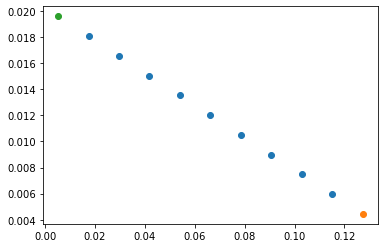

In [65]:
from scipy.optimize import fsolve
import math

ED = math.sqrt((xD-xE)**2 + (yD-yE)**2)
def equation(input,i):
    xP,yP = input
    return (xE-xD)*(yE-yP) - (yE-yD)*(xE-xP), (xE-xP)**2 + (yE-yP)**2 -(ED**2)*(i/10)**2

X,Y = [],[]
for i in range(1,10):
    xP,yP = fsolve(equation,(1,1),i)
    X.append(xP)
    Y.append(yP)

import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.scatter(xD,yD)
plt.scatter(xE,yE)


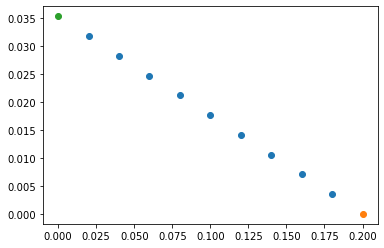

In [71]:
stepienie = 0.2
xD = stepienie
xE = 0
yD = 0
gamma = 10
gamma_rad = math.radians(gamma)
yE = math.tan(gamma_rad) * xD
D = xD,yD
E = xE,yE

ED = math.sqrt((xD-xE)**2 + (yD-yE)**2)
def equation(input,i):
    xP,yP = input
    return (xE-xD)*(yE-yP) - (yE-yD)*(xE-xP), (xE-xP)**2 + (yE-yP)**2 -(ED**2)*(i/10)**2

X,Y = [],[]
for i in range(1,10):
    xP,yP = fsolve(equation,(1,1),i)
    X.append(xP)
    Y.append(yP)

import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.scatter(xD,yD)
plt.scatter(xE,yE)